In [1]:
!wget -O epa-sea-level.csv "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/main/epa-sea-level.csv"
import pandas as pd
df = pd.read_csv("epa-sea-level.csv")
df.head()

--2025-07-20 03:56:35--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/main/epa-sea-level.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5912 (5.8K) [text/plain]
Saving to: ‘epa-sea-level.csv’

epa-sea-level.csv   100%[===================>]   5.77K  --.-KB/s    in 0s      

2025-07-20 03:56:35 (56.6 MB/s) - ‘epa-sea-level.csv’ saved [5912/5912]



,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
def draw_plot():
    df = pd.read_csv("epa-sea-level.csv")
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', s=10)
    reg_all = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    x_all = np.arange(df['Year'].min(), 2051)
    y_all = reg_all.intercept + reg_all.slope * x_all
    ax.plot(x_all, y_all, 'r', label='Fit: 1880–2050')
    df_recent = df[df['Year'] >= 2000]
    reg_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    x_recent = np.arange(2000, 2051)
    y_recent = reg_recent.intercept + reg_recent.slope * x_recent
    ax.plot(x_recent, y_recent, 'green', label='Fit: 2000–2050')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    ax.legend()
    fig.savefig('sea_level_plot.png')
    return fig

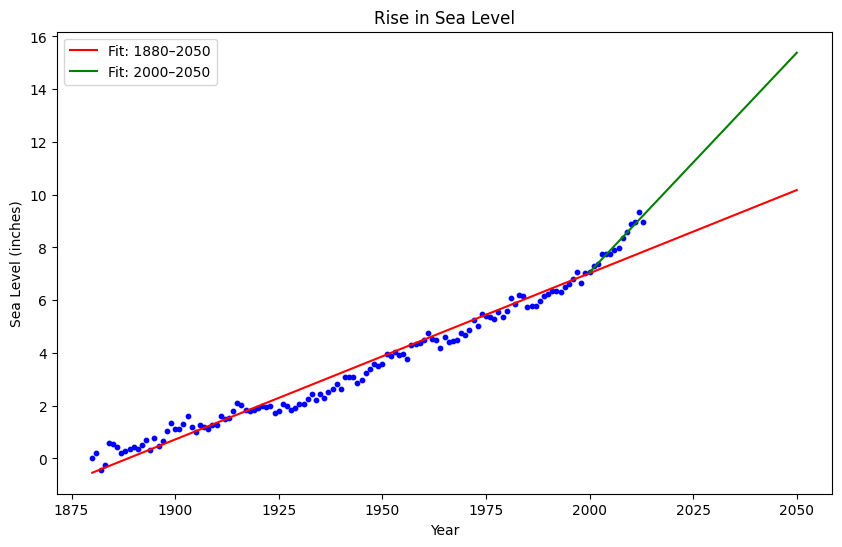

In [3]:
fig=draw_plot()
plt.show()